### Actividad 4 - Punto 2 - Optimizacion

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

En base a la funcion de utilidad se busca maximizar la utilidad del consumidor en la compra de 2 productos, teniendo en cuenta la restriccion del presupuesto de \\$154.  

Funcion de Utilidad: $$ \sqrt{xy} $$  

Precio de los productos:  
P1 = \\$12  
P2 = \\$10  

Funcion de restriccion: 12x + 10y = 154


In [15]:
# funcion de utilidad
x,y = symbols("x y")
funcion_1 = sqrt(x*y)
funcion_1

sqrt(x*y)

In [16]:
# restriccion
funcion_2 = 12*x + 10*y - 154
funcion_2

12*x + 10*y - 154

In [17]:
# derivada parcial de la funcion a optimizar

f_1_der_1_x = funcion_1.diff(x)
f_1_der_1_y = funcion_1.diff(y)


In [18]:
# derivada parcial de la funcion de restriccion
f_2_der_1_x = funcion_2.diff(x)
f_2_der_1_y = funcion_2.diff(y)


In [19]:
# calculando del multiplicador de lagrange
l = symbols("l")

DL = np.array([
            f_1_der_1_x - l*f_2_der_1_x,
            f_1_der_1_y - l*f_2_der_1_y,
            - funcion_2
        ])



In [20]:
res = solve([Eq(DL[0],0),
       Eq(DL[1],0),
       Eq(DL[2],0)],[x,y,l], simplify=False)

In [21]:
print("valor x: ", res[0][0])
print("valor y: ", res[0][1])

valor x:  77/12
valor y:  77/10


#### Grafica de la optimizacion de la utilidad

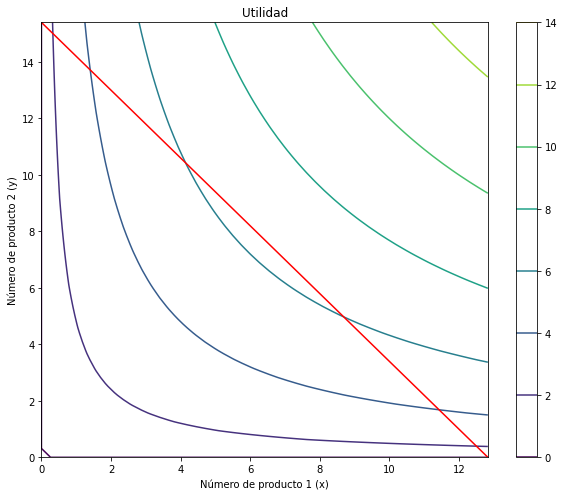

In [22]:

# productos min y max
p1_min, p1_max = (0, 154/12)
p2_min, p2_max = (0, 154/10)

# funcion de utilidad
f_fun_1 = lambdify('x,y',funcion_1)
# funcion de restriccion en base a x
f_n_y = lambda x, pre: (pre - 12*x)/10

fig, ax_r = plt.subplots(1, figsize = (10, 8))

p1_axis = np.linspace(p1_min, p1_max)
p2_axis = np.linspace(p2_min, p2_max)
p1_grid, p2_grid = np.meshgrid(p1_axis, p1_axis)

im2 = ax_r.contour(f_fun_1(p1_grid,p2_grid), extent=[p1_min, p1_max, p2_min, p2_max])
ax_r.plot(p1_axis, f_n_y(p1_axis, 154), 'r')
ax_r.set_xlabel('Número de producto 1 (x)')
ax_r.set_ylabel('Número de producto 2 (y)')
ax_r.set_title('Utilidad')


plt.colorbar(im2,ax=ax_r)

plt.show()